In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter

In [85]:
path = '2017_jun_final.csv'
df = pd.read_csv(path)

In [86]:
df.head()
df.set_index('N')

,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
N,,,,,,,,,,,,,,,,,,,,,
1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,Аутсорсингова,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,Аутсорсингова,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,Продуктова,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,QA engineer,NaN,Manual QA,1,менше 3 місяців,700,700,Одеса,до 50 осіб,Аутсорсингова,...,False,Intermediate (середній),"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8701,Marketing,NaN,NaN,0.5,0.5,400,120,Київ,до 50 осіб,Продуктова,...,False,Pre-intermediate (нище середнього),eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львів,до 10 осіб,Аутстафінгова,...,False,Upper-Intermediate (вище середнього),"Веб-розробка,Корпоративні системи",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV


In [87]:
df.shape

(8704, 25)

In [88]:
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [89]:
df.isnull().sum()

N                                      0
Посада                                 0
Мова програмування                  3850
Спеціалізація                       7219
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Університет                          358
Ще студент                             0
Рівень англійської                     0
Предметна область                    223
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [90]:
df = df.loc[:,(-df.isnull().any()) | (df.columns.isin(['Мова програмування']))]
df

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харків,до 10 осіб,Аутсорсингова,жіноча,20,Неповна Вища,True,Pre-intermediate (нище середнього),12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,Аутсорсингова,жіноча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,1,менше 3 місяців,700,700,Одеса,до 50 осіб,Аутсорсингова,чоловіча,23,Вища,False,Intermediate (середній),12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,8701,Marketing,NaN,0.5,0.5,400,120,Київ,до 50 осіб,Продуктова,жіноча,22,Вища,False,Pre-intermediate (нище середнього),12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львів,до 10 осіб,Аутстафінгова,чоловіча,30,Неповна Вища,False,Upper-Intermediate (вище середнього),12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,8703,Team lead,NaN,6,4,2600,0,Дніпро,більше 1000 осіб,Аутсорсингова,чоловіча,34,Вища,False,Advanced (просунутий),12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


In [91]:
df.isnull().sum()

N                                      0
Посада                                 0
Мова програмування                  3850
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Ще студент                             0
Рівень англійської                     0
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [92]:
df.dropna(how = 'any', inplace=True)

In [56]:
df.shape

(4854, 20)

In [93]:
python_data = df[df['Мова програмування'] =='Python']

In [94]:
groups = python_data.groupby('Посада').aggregate({'Зарплата на місяць': ['min','max']})


In [95]:
def fill_avg_salary(min,max):
    return (min+max)/2

groups['Зарплата на місяць','avg'] = groups.apply(lambda row: fill_avg_salary(row.loc['Зарплата на місяць', 'min'], row.loc['Зарплата на місяць', 'max']), axis = 1)
groups


Зарплата на місяць              
                                        min   max     avg
Посада                                                   
Junior Software Engineer                100  1250   675.0
Senior Software Engineer               1300  9200  5250.0
Software Engineer                       500  5400  2950.0
System Architect                       3000  5000  4000.0
Technical Lead                         1425  6200  3812.5

In [96]:
groups['Зарплата на місяць','avg'].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: (Зарплата на місяць, avg), dtype: float64

In [97]:
groups.to_csv('python_devs_group.csv')

Text(0.5, 1.0, 'Залежність розміру заробітної плати від досвіду роботи')

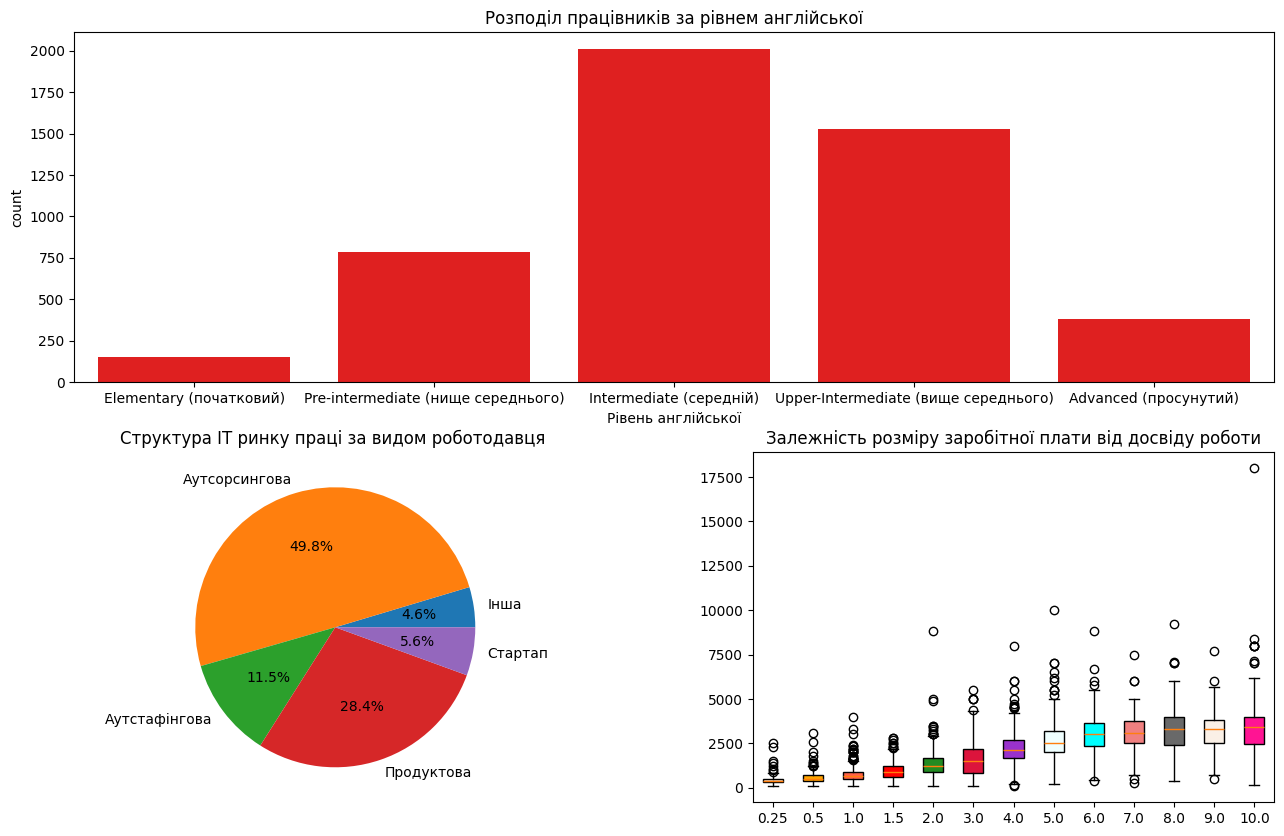

In [126]:
fig = plt.figure(layout=None, facecolor='white', figsize=[15,10])
gs = fig.add_gridspec(nrows=2, ncols=2, left=0.1, right=0.9,
                      hspace=0.2, wspace=0.3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
labels = ['Elementary (початковий)', 'Pre-intermediate (нище середнього)','Intermediate (середній)','Upper-Intermediate (вище середнього)', 'Advanced (просунутий)' ]
first_chart = sns.countplot(df, x = 'Рівень англійської', order = labels, color = 'red', ax = ax0)
first_chart.set_title('Розподіл працівників за рівнем англійської')
df.replace('Аутстаффинговая','Аутстафінгова', inplace=True )
values  = df.groupby("Тип компанії").agg('count')['N']
ax1.pie(values,autopct ='%1.1f%%', labels = values.index )
ax1.set_title('Структура IT ринку праці за видом роботодавця ')


experience_data  = df.loc[:,['Загальний досвід роботи','Зарплата на місяць']]
experience_data['Загальний досвід роботи'] = experience_data['Загальний досвід роботи'].replace({'10 і більше років':10,'менше 3 місяців': 3}).apply(lambda x: float(x))
xticks = np.sort(experience_data['Загальний досвід роботи'].unique())
boxplot_x = []

for value in xticks:
    df_to_append = experience_data[experience_data['Загальний досвід роботи']==value]
    x_to_append = df_to_append['Зарплата на місяць']
    boxplot_x.append(x_to_append)

colors = ['peachpuff', 'orange', 'tomato', 'red', 'forestgreen', 'crimson', 'darkorchid', 'azure', 'cyan', 'lightcoral', 'dimgray' , 'linen','deeppink']

third_chart = ax2.boxplot(boxplot_x, tick_labels=xticks,patch_artist=True)
for patch, color in zip(third_chart['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_title('Залежність розміру заробітної плати від досвіду роботи')
